In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from src.preprocessing import clean_data, imput_missing_values
from src.analysis_utils import check_route, check_dates
from src.visualization_utils import plot_feature_distribution, generate_hist, plot_before_after_imputation, plot_correlation

In [2]:
df_train = pd.read_csv('../data/raw/training.csv', sep='\t')
df_val = pd.read_csv('../data/raw/validation.csv', sep='\t')

# Data quality

In [3]:
df_train.head()

DepartureDate  DepartureYear  DepartureMonth  DepartureDay  FlightNumber  \
0    01/10/2016           2016              10             1          1145   
1    01/10/2016           2016              10             1          1160   
2    01/10/2016           2016              10             1          1183   
3    01/10/2016           2016              10             1          1220   
4    01/10/2016           2016              10             1          1225   

  DepartureAirport ArrivalAirport    Route  ActualFlightTime  ActualTotalFuel  \
0              MAN            SXF  MAN-SXF                91             3660   
1              CTA            FCO  CTA-FCO                68             3280   
2              LGW            SNN  LGW-SNN                64             2720   
3              ATH            CHQ  ATH-CHQ                35             1682   
4              CHQ            ATH  CHQ-ATH                34             1877   

  ActualTOW FLownPassengers BagsCount FlightBagsWeight  
0     64016             175        61              440  
1     66138             182        27              350  
2     58447             127    (null)           (null)  
3     60587             163        12              150  
4     63090             178        37              490

In [4]:
print('Records count in training set:', len(df_train))

Records count in training set: 29731


In [5]:
df_val.head()

DepartureDate  DepartureYear  DepartureMonth  DepartureDay  FlightNumber  \
0    01/11/2016           2016              11             1          6003   
1    01/11/2016           2016              11             1          6004   
2    01/11/2016           2016              11             1          6542   
3    01/11/2016           2016              11             1          6541   
4    01/11/2016           2016              11             1          5542   

  DepartureAirport ArrivalAirport    Route  ActualFlightTime  ActualTotalFuel  \
0              MRS            BES  MRS-BES                84             3630   
1              BES            MRS  BES-MRS                86             3690   
2              MRS            STN  MRS-STN               100             4390   
3              STN            MRS  STN-MRS               100             4690   
4              STN            REU  STN-REU               112             4900   

  FLownPassengers BagsCount FlightBagsWeight  
0             185        43              560  
1             188    (null)           (null)  
2             168        55              720  
3             185        35              460  
4             167        31              400

In [6]:
print('Records count in validation set:', len(df_val))

Records count in validation set: 1878


## Checking missing values and duplicates

In [7]:
print('Count of duplicates in training set:', df_train.duplicated().sum())
print('Count of duplicates in validation set:', df_val.duplicated().sum())

Count of duplicates in training set: 0
Count of duplicates in validation set: 0


In [8]:
df_train.replace('(null)', np.nan, inplace=True)
print('Missing values in training set [%]:')
(df_train.isna().sum()/len(df_train))*100

Missing values in training set [%]:


DepartureDate       0.000000
DepartureYear       0.000000
DepartureMonth      0.000000
DepartureDay        0.000000
FlightNumber        0.000000
DepartureAirport    0.000000
ArrivalAirport      0.000000
Route               0.000000
ActualFlightTime    0.000000
ActualTotalFuel     0.000000
ActualTOW           1.456392
FLownPassengers     0.319532
BagsCount           7.682217
FlightBagsWeight    8.334735
dtype: float64

In [9]:
df_val.replace('(null)', np.nan, inplace=True)
print('Missing values in validation set [%]:')
(df_val.isna().sum()/len(df_val))*100

Missing values in validation set [%]:


DepartureDate       0.000000
DepartureYear       0.000000
DepartureMonth      0.000000
DepartureDay        0.000000
FlightNumber        0.000000
DepartureAirport    0.000000
ArrivalAirport      0.000000
Route               0.000000
ActualFlightTime    0.000000
ActualTotalFuel     0.000000
FLownPassengers     0.479233
BagsCount           8.945687
FlightBagsWeight    9.637913
dtype: float64

## Checking if the date columns match

Checking if records match between <i>DepartureDate</i> and <i>DepartureYear</i>, <i>DepartureMonth</i>, <i>DepartureDay</i>.

In [10]:
check_dates(df_train)

The data is chronological: False
Records with different dates in columns:


DepartureDate  DepartureYear  DepartureMonth  DepartureDay  \
10343    07/10/2016           2016              10             6   
16394    10/10/2016           2016              10             9   

       FlightNumber DepartureAirport ArrivalAirport    Route  \
10343          7070              BCN            FCO  BCN-FCO   
16394           262              ALC            IBZ  ALC-IBZ   

       ActualFlightTime  ActualTotalFuel ActualTOW FLownPassengers BagsCount  \
10343                70             3310     64415             177        21   
16394                96             3430     57032              96       NaN   

      FlightBagsWeight DepartureDate_converted  
10343              270              2016-10-07  
16394              NaN              2016-10-10

In [11]:
check_dates(df_val)

The data is chronological: True
All records match between 'DepartureDate' and day/month/year columns.


In [12]:
print('Counts of unique dates in validation set:', len(df_val['DepartureDate'].unique()))

Counts of unique dates in validation set: 1


## Checking if the route columns match

Checking if records match between <i>Route</i> and <i>DepartureAirport</i>, <i>ArrivalAirport</i> columns.

In [13]:
check_route(df_train)

All records match between 'Route' and 'DepartureAirport', 'ArrivalAirport' columns.


In [14]:
check_route(df_val)

All records match between 'Route' and 'DepartureAirport', 'ArrivalAirport' columns.


# Data analysis         

In [15]:
df_train.columns

Index(['DepartureDate', 'DepartureYear', 'DepartureMonth', 'DepartureDay',
       'FlightNumber', 'DepartureAirport', 'ArrivalAirport', 'Route',
       'ActualFlightTime', 'ActualTotalFuel', 'ActualTOW', 'FLownPassengers',
       'BagsCount', 'FlightBagsWeight'],
      dtype='object')

In [16]:
numerical_features = ['ActualFlightTime', 'ActualTotalFuel', 'FLownPassengers', 'BagsCount', 'FlightBagsWeight']

In [17]:
df_train_clean = clean_data(df_train)
df_train_clean_completed = imput_missing_values(df_train_clean)

100%|██████████| 29297/29297 [05:00<00:00, 97.50it/s] 


In [18]:
print("Training set after cleansing and missing values completed:")
print(df_train_clean_completed.isna().sum())
df_train_clean_completed[numerical_features].describe().round()

Training set after cleansing and missing values completed:
DepartureDate       0
DepartureYear       0
DepartureMonth      0
DepartureDay        0
FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
ActualTOW           0
FLownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64


ActualFlightTime  ActualTotalFuel  FLownPassengers  BagsCount  \
count           29298.0          29298.0          29298.0    29298.0   
mean              110.0           4780.0            167.0       45.0   
std                52.0           2063.0             20.0       32.0   
min                 2.0            600.0              4.0        1.0   
25%                73.0           3210.0            163.0       24.0   
50%               105.0           4530.0            173.0       41.0   
75%               139.0           6000.0            179.0       59.0   
max              1504.0          14907.0            189.0     1180.0   

       FlightBagsWeight  
count           29298.0  
mean              576.0  
std               368.0  
min                 3.0  
25%               310.0  
50%               520.0  
75%               760.0  
max             10530.0

In [19]:
df_val_clean = clean_data(df_val, train_set=False)
df_val_clean_completed = imput_missing_values(df_val_clean, df_train_clean_completed)

  0%|          | 0/1877 [00:00<?, ?it/s]

100%|██████████| 1877/1877 [00:27<00:00, 68.70it/s]


In [20]:
print("Validation set after cleansing and missing values completed:")
print(df_val_clean_completed.isna().sum())
df_val_clean_completed[numerical_features].describe().round()

Validation set after cleansing and missing values completed:
DepartureDate       0
DepartureYear       0
DepartureMonth      0
DepartureDay        0
FlightNumber        0
DepartureAirport    0
ArrivalAirport      0
Route               0
ActualFlightTime    0
ActualTotalFuel     0
FLownPassengers     0
BagsCount           0
FlightBagsWeight    0
dtype: int64


ActualFlightTime  ActualTotalFuel  FLownPassengers  BagsCount  \
count            1878.0           1878.0           1878.0     1878.0   
mean              110.0           4709.0            166.0       36.0   
std                51.0           2072.0             26.0       23.0   
min                 7.0           1100.0              6.0        2.0   
25%                72.0           3200.0            163.0       20.0   
50%               104.0           4420.0            174.0       32.0   
75%               140.0           5896.0            180.0       46.0   
max               318.0          13040.0            189.0      260.0   

       FlightBagsWeight  
count            1878.0  
mean              450.0  
std               268.0  
min                20.0  
25%               260.0  
50%               400.0  
75%               568.0  
max              1730.0

In [21]:
print("Count of unique values in 'Route' (training set):", len(df_train_clean_completed['Route'].unique()))
print("Count of unique values in 'Route' (validation set):", len(df_val_clean_completed['Route'].unique()))

Count of unique values in 'Route' (training set): 2647
Count of unique values in 'Route' (validation set): 1383


In [22]:
generate_hist(df_train_clean_completed['ActualTOW'], x_title="ActualTOW [kg]")

## Distribution of numerical data

In [23]:
for col in numerical_features:
    plot_feature_distribution(df_train_clean_completed, df_val_clean_completed, col)

## Compiration of data before and after missing values completed

In [24]:
for col in numerical_features[2:]:
    plot_before_after_imputation(df_train_clean, df_train_clean_completed, df_val_clean, df_val_clean_completed, col)

## Correlation between features

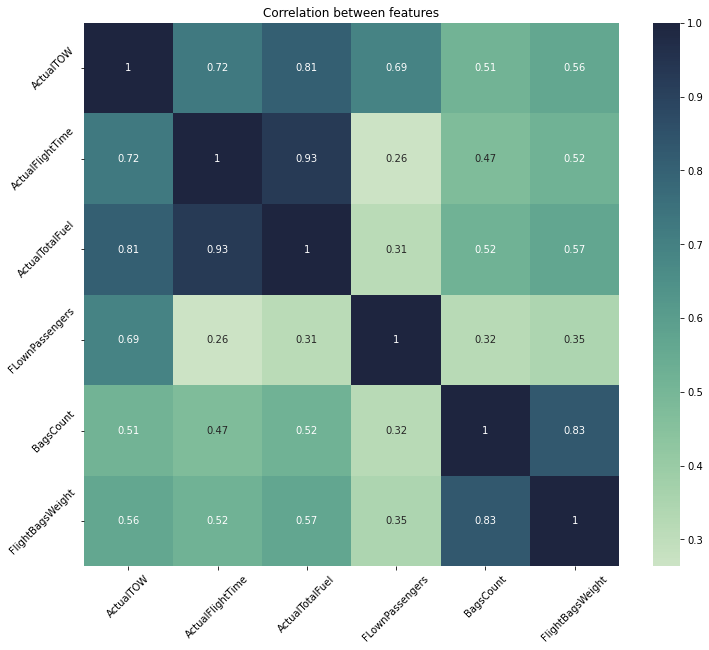

In [25]:
plot_correlation(df_train_clean_completed, ['ActualTOW']+numerical_features)

In [26]:
df_train_clean_completed.to_csv('../data/temp/training_cleaned.csv', index=False, sep='\t')
df_val_clean_completed.to_csv('../data/temp/validation_cleaned.csv', index=False, sep='\t')